<a href="https://colab.research.google.com/github/jpradeesh3800/ml/blob/master/Logistic_Regression_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [0]:
df_train = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
df_test = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

In [48]:
df_train.head()

,120,4,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [49]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df_train = pd.DataFrame(np.array(df_train),columns =column_names )
df_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.4,2.8,5.6,2.2,2.0
1,5.0,2.3,3.3,1.0,1.0
2,4.9,2.5,4.5,1.7,2.0
3,4.9,3.1,1.5,0.1,0.0
4,5.7,3.8,1.7,0.3,0.0


In [50]:
df_test = pd.DataFrame(np.array(df_train),columns =column_names )
df_test.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.4,2.8,5.6,2.2,2.0
1,5.0,2.3,3.3,1.0,1.0
2,4.9,2.5,4.5,1.7,2.0
3,4.9,3.1,1.5,0.1,0.0
4,5.7,3.8,1.7,0.3,0.0


In [51]:
df_train.species.value_counts()

0.0    42
2.0    42
1.0    36
Name: species, dtype: int64

In [52]:
df_train.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,5.845000,3.065000,3.739167,1.196667,1.000000
std,0.868578,0.427156,1.822100,0.782039,0.840168
min,4.400000,2.000000,1.000000,0.100000,0.000000
25%,5.075000,2.800000,1.500000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.425000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


*When the labels are not one hot encoded , we can use sparse_categorical_crossentropy else categorical_crossentropy*

In [53]:
train_X = df_train[column_names]
train_Y = train_X.pop("species")
train_X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [67]:
model1 = tf.keras.Sequential([
                              tf.keras.layers.Dense(64,activation='relu',input_shape=(4,)),
                              tf.keras.layers.Dropout(0.2),
                              tf.keras.layers.Dense(64,activation='relu'),
                              tf.keras.layers.Dropout(0.2),
                              tf.keras.layers.Dense(3,activation='softmax')
])
model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model1.fit(train_X,train_Y,epochs=20)

Train on 120 samples
Epoch 1/20
120/120 [==============================] - 0s 2ms/sample - loss: 1.6556 - acc: 0.3583
Epoch 2/20
120/120 [==============================] - 0s 116us/sample - loss: 1.4092 - acc: 0.3083
Epoch 3/20
120/120 [==============================] - 0s 108us/sample - loss: 1.2170 - acc: 0.3833
Epoch 4/20
120/120 [==============================] - 0s 105us/sample - loss: 1.1522 - acc: 0.3667
Epoch 5/20
120/120 [==============================] - 0s 92us/sample - loss: 1.0824 - acc: 0.4250
Epoch 6/20
120/120 [==============================] - 0s 99us/sample - loss: 0.9555 - acc: 0.4750
Epoch 7/20
120/120 [==============================] - 0s 85us/sample - loss: 0.9563 - acc: 0.5583
Epoch 8/20
120/120 [==============================] - 0s 91us/sample - loss: 0.8912 - acc: 0.5583
Epoch 9/20
120/120 [==============================] - 0s 84us/sample - loss: 0.8265 - acc: 0.6167
Epoch 10/20
120/120 [==============================] - 0s 96us/sample - loss: 0.7976 - acc: 0.6

In [68]:
test_X = df_test[column_names]
test_Y = test_X.pop("species")
test_X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [69]:
results = model1.evaluate(test_X,test_Y)
for x,y in zip(model1.metrics_names,results):
    print("{:20s}:{}".format(x,y))

120/120 [==============================] - 0s 1ms/sample - loss: 0.4347 - acc: 0.9167
loss                :0.43470325668652854
acc                 :0.9166666865348816


In [57]:
model1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 64)                320       
_________________________________________________________________
dropout_27 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


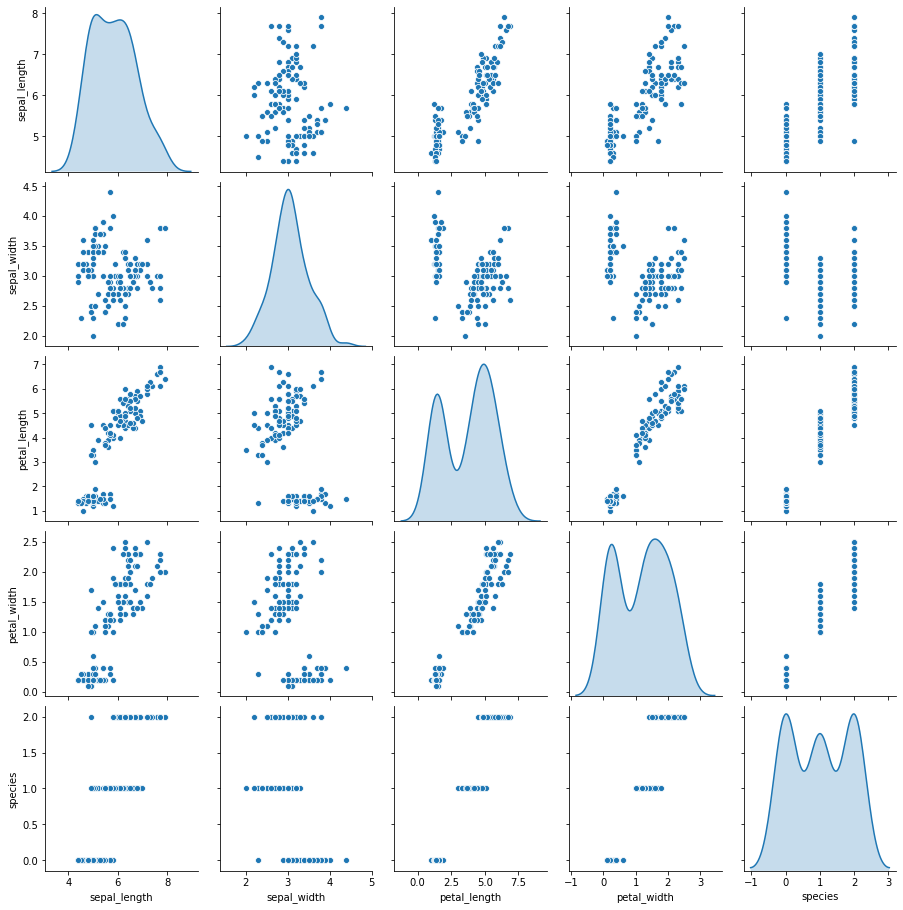

In [58]:
import seaborn as sns
sns.pairplot(df_train,diag_kind='kde')

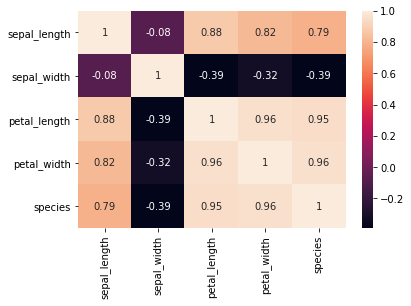

In [59]:
corr_matrix = df_train.corr().round(2)
sns.heatmap(data=corr_matrix,annot=True)

*Since Correlation between petal_width and petal_lenght are very close to one. We can remove one of the features safely*

*sepal_length has more correlation with species (target label)*

*Lets Train a model with sepal_length , petal_lenght and sepal_width features*

In [76]:
model2 = tf.keras.Sequential([
                              tf.keras.layers.Dense(64,activation='relu',input_shape=(3,)),
                              tf.keras.layers.Dropout(0.2),
                              tf.keras.layers.Dense(64,activation='relu'),
                              tf.keras.layers.Dropout(0.2),
                              tf.keras.layers.Dense(3,activation='softmax')
])
model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
X = train_X[['sepal_length','petal_length','sepal_width']]
model2.fit(X,train_Y,epochs=20)

Train on 120 samples
Epoch 1/20
120/120 [==============================] - 0s 2ms/sample - loss: 1.1959 - acc: 0.3917
Epoch 2/20
120/120 [==============================] - 0s 116us/sample - loss: 1.1320 - acc: 0.3833
Epoch 3/20
120/120 [==============================] - 0s 112us/sample - loss: 1.0002 - acc: 0.4583
Epoch 4/20
120/120 [==============================] - 0s 78us/sample - loss: 0.9378 - acc: 0.5333
Epoch 5/20
120/120 [==============================] - 0s 89us/sample - loss: 0.9159 - acc: 0.5583
Epoch 6/20
120/120 [==============================] - 0s 91us/sample - loss: 0.7926 - acc: 0.6583
Epoch 7/20
120/120 [==============================] - 0s 81us/sample - loss: 0.8195 - acc: 0.6333
Epoch 8/20
120/120 [==============================] - 0s 80us/sample - loss: 0.6854 - acc: 0.7250
Epoch 9/20
120/120 [==============================] - 0s 82us/sample - loss: 0.7105 - acc: 0.6667
Epoch 10/20
120/120 [==============================] - 0s 90us/sample - loss: 0.6230 - acc: 0.77

In [77]:
X=test_X[['sepal_length','petal_length','sepal_width']]
results = model2.evaluate(X,test_Y)
for x,y in zip(model2.metrics_names,results):
    print("{:20s}:{}".format(x,y))

120/120 [==============================] - 0s 2ms/sample - loss: 0.3492 - acc: 0.8917
loss                :0.3492143750190735
acc                 :0.8916666507720947


In [62]:
model2.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 64)                192       
_________________________________________________________________
dropout_29 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_30 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 3)                 195       
Total params: 4,547
Trainable params: 4,547
Non-trainable params: 0
_________________________________________________________________
